In [99]:
import sys
sys.path.append('../')
from quantization.posttraining.layer_scale_optimization import *
from collections import namedtuple
from tqdm import tqdm
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
args_dict = {'arch': 'resnet18', 'custom_resnet': True, 'pretrained': True, 'dataset': 'imagenet', 'gpu_ids': [0], 'datapath': None,
                     'batch_size': 512, 'shuffle': True, 'workers': 25, 'print_freq': 10,
                     'cal_batch_size': 512, 'cal_set_size': 512}
args_dict['bit_act'] = 2
args_dict['bit_weights'] = None
args_dict['pre_relu'] = False
args_dict['qtype'] = None
args = argparse.Namespace()
for k in args_dict:
    setattr(args, k, args_dict[k])
args

Namespace(arch='resnet18', batch_size=512, bit_act=2, bit_weights=None, cal_batch_size=512, cal_set_size=512, custom_resnet=True, datapath=None, dataset='imagenet', gpu_ids=[0], pre_relu=False, pretrained=True, print_freq=10, qtype=None, shuffle=True, workers=25)

In [108]:
# create model
# Always enable shuffling to avoid issues where we get bad results due to weak statistics
inf_model = CnnModel(args.arch, args.custom_resnet, args.pretrained, args.dataset, args.gpu_ids, args.datapath,
                     batch_size=args.batch_size, shuffle=True, workers=args.workers, print_freq=args.print_freq,
                     cal_batch_size=args.cal_batch_size, cal_set_size=args.cal_set_size)

layers = []
if args.bit_act is not None:
    layers += [n for n, m in inf_model.model.named_modules() if isinstance(m, nn.ReLU)]
layers = [layers[10], layers[14]]
replacement_factory = {nn.ReLU: ActivationModuleWrapperPost,
                       nn.ReLU6: ActivationModuleWrapperPost,
                       nn.Conv2d: ParameterModuleWrapperPost}
mq = ModelQuantizer(inf_model.model, args, layers, replacement_factory)

In [76]:
n = 21
x = np.linspace(0.1, 2.5, n)
y = np.linspace(0.1, 2.5, n)
X, Y = np.meshgrid(x, y)

In [109]:
Z = np.empty((n, n))
for i in tqdm(range(n*n)):
    i0 = int(i / n)
    i1 = i % n
    # set clip value to qwrappers
    scales = np.array([X[i0][i1], Y[i0][i1]])
    set_clipping(mq, scales, inf_model.device)
    
    # evaluate with clipping
    loss = inf_model.evaluate_calibration()
    Z[i0][i1] = loss.item()

100%|██████████| 441/441 [01:53<00:00,  3.90it/s]


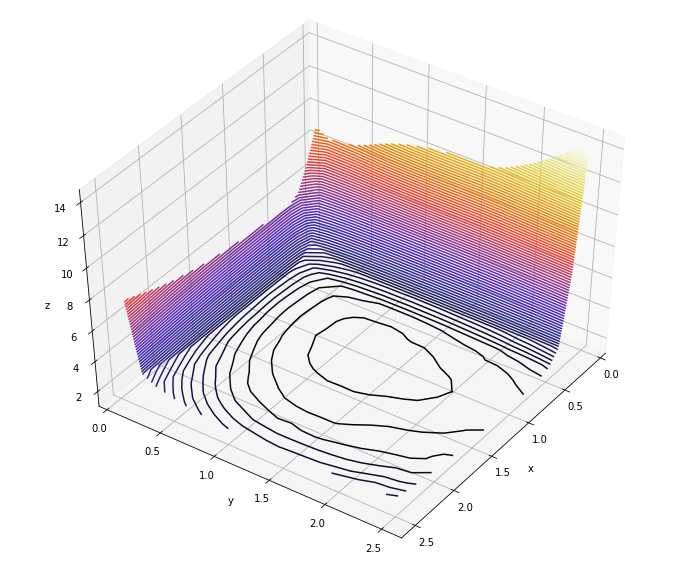

In [110]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap=cm.CMRmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(45, 35)

In [111]:
# fig = plt.figure(figsize=(12, 10))
# ax = plt.axes(projection='3d')
# ax.plot_wireframe(X, Y, Z, color='black')
# ax.set_title('wireframe');
# ax.view_init(45, 20)

In [112]:
n = 21
x = np.linspace(0.5, 2.5, n)
y = np.linspace(0.5, 2.5, n)
X, Y = np.meshgrid(x, y)
Z = np.empty((n, n))
for i in tqdm(range(n*n)):
    i0 = int(i / n)
    i1 = i % n
    # set clip value to qwrappers
    scales = np.array([X[i0][i1], Y[i0][i1]])
    set_clipping(mq, scales, inf_model.device)
    
    # evaluate with clipping
    loss = inf_model.evaluate_calibration()
    Z[i0][i1] = loss.item()

100%|██████████| 441/441 [01:37<00:00,  4.53it/s]


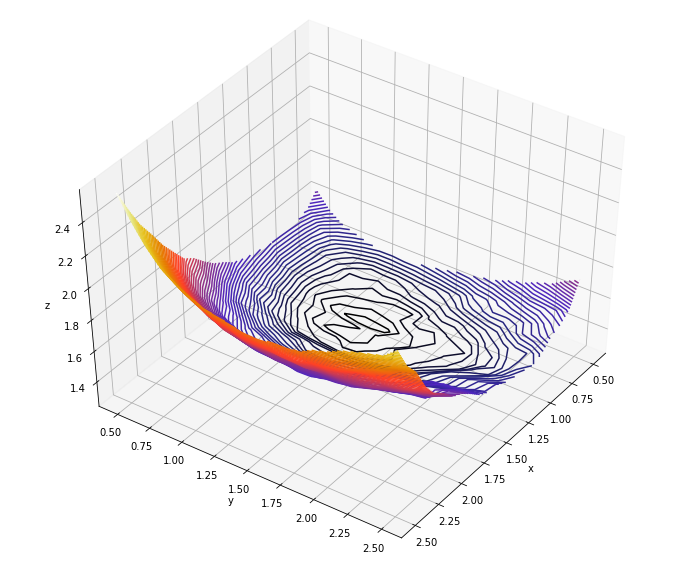

In [113]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap=cm.CMRmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(45, 35)

In [114]:
n = 21
x = np.linspace(0.1, 10, n)
y = np.linspace(0.1, 10, n)
X, Y = np.meshgrid(x, y)
Z = np.empty((n, n))
for i in tqdm(range(n*n)):
    i0 = int(i / n)
    i1 = i % n
    # set clip value to qwrappers
    scales = np.array([X[i0][i1], Y[i0][i1]])
    set_clipping(mq, scales, inf_model.device)
    
    # evaluate with clipping
    loss = inf_model.evaluate_calibration()
    Z[i0][i1] = loss.item()

100%|██████████| 441/441 [01:36<00:00,  4.57it/s]


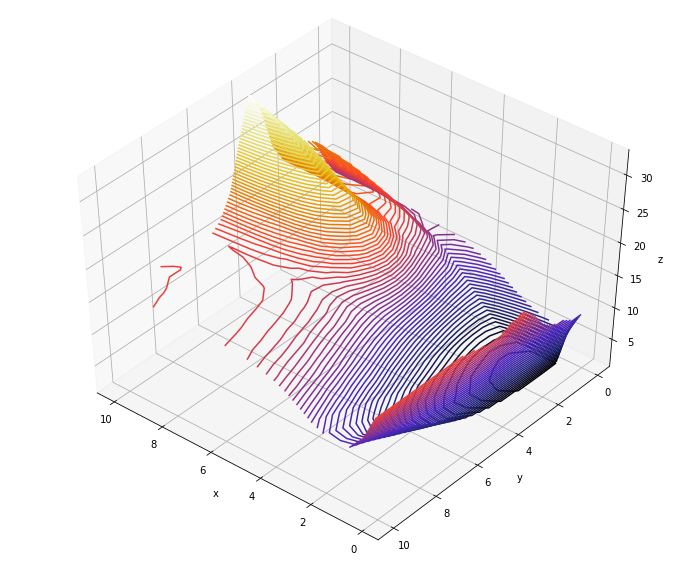

In [133]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap=cm.CMRmap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(45, 130)